<a href="https://colab.research.google.com/github/willbastosferreira/estatistica/blob/main/Estat_Prob_Amost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística para Data Science
*Probabilidade e Amostragem*


#### 1 -  Dataset do Projeto

#### Pesquisa Nacional por Amostra de domicílios - 2015

 *O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da Pesquisa Nacional por Amostra de Domicílios - PNAD, tem como finalidade a produção de informações básicas para o estudo do desenvolvimento socioeconômico do País. Trata-se de um sistema de pesquisas por amostra de domicílios que, por ter propósitos múltiplos, investiga diversas características socioeconômicas e demográficas, umas de caráter permanente nas pesquisas, como as características gerais da população, de educação, trabalho, rendimento e habitação, e outras com periodicidade variável, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar e outros temas que são incluídos no sistema de acordo com as necessidades de informação para o País.*




In [1]:
## importando as bibliotecas

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm

In [2]:
#importando os dados

#os.chdir('C:\\Users\\basfe\\DataspellProjects\\Learning Data Science  - Will\Data')
dados = pd.read_csv('dados.csv')
dados.head()


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
# decodificando os registros utilzando dicionarios

sexo = {
    0:'Masculino',
    1:'Feminino'
}

cor = {
    0:'Indígena',
    2:'Branca',
    4:'Preta',
    6:'Amarela',
    8:'Parda',
    9:'Sem declaração'
}

anos_de_estudo = {
    1:'Sem instrução e menos de 1 ano',
    2:'1 anos',
    3:'2 anos',
    4:'3 anos',
    5:'4 anos',
    6:'5 anos',
    7:'6 anos',
    8:'7 anos',
    9:'8 anos',
    10:'9 anos',
    11:'10 anos',
    12:'11 anos',
    13:'12 anos',
    14:'13 anos',
    15:'14 anos',
    16:'15 anos ou mais',
    17:'Não determinados',
}

uf = {
    11:'Rondônia',
    12:'Acre',
    13:'Amazonas',
    14:'Roraima',
    15:'Pará',
    16:'Amapá',
    17:'Tocantis',
    21:'Maranhão',
    22:'Piauí',
    23:'Ceará',
    24:'Rio Grande do Norte',
    25:'Paraíba',
    26:'Pernambuco',
    27:'Alagoas',
    28:'Sergipe',
    29:'Bahia',
    31:'Minas Gerais',
    32:'Espírito Santo',
    33:'Rio de Janeiro',
    35:'São Paulo',
    41:'Paraná',
    42:'Santa Catarina',
    43:'Rio Grande do Sul',
    50:'Mato Grosso do Sul',
    51:'Mato Grosso',
    52:'Goiás',
    53:'Distrito Federal'
}

In [4]:
# criando dataframes a partir dos dicionarios

df_sexo = pd.DataFrame.from_dict(data=sexo, orient='index').rename(columns={0:'Sexo', 1:'Var'})
df_anos_de_estudo = pd.DataFrame.from_dict(data=anos_de_estudo, orient='index').rename(columns={0:'Idade'})
df_uf = pd.DataFrame.from_dict(data=uf, orient='index').rename(columns={0:'Estado'})

In [5]:
# df_sexo.columns.name = 'Id' ## para renomear a coluna do index
df_sexo

,Sexo
0,Masculino
1,Feminino


In [6]:
df_anos_de_estudo

,Idade
1,Sem instrução e menos de 1 ano
2,1 anos
3,2 anos
4,3 anos
5,4 anos
6,5 anos
7,6 anos
8,7 anos
9,8 anos
10,9 anos


In [7]:
df_uf

,Estado
11,Rondônia
12,Acre
13,Amazonas
14,Roraima
15,Pará
16,Amapá
17,Tocantis
21,Maranhão
22,Piauí
23,Ceará


# 2 Distribuições de Probabilidade


### 2.1 Distribuição Binomial
*Um evento binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.
Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de sucesso e fracasso.*

#### Experimento Binomial

Saiba mais: [Distribuição Binomial](https://www.voitto.com.br/blog/artigo/distribuicao-binomial)

1. Realização de ***n*** ensaios idênticos.
2. Os ensaios são independentes.
3. Somentos dois resultados são possíveis, exemplo: Verdadeiro ou falso; cara ou coroa; sucesso ou fracasso.
4. A probabilidade do sucesso é representada por ***p*** e a do fracasso ***1 - p = q***. Estas probabilidades não se modificam de ensaio para ensaio.



 ![dist_binominal](https://miro.medium.com/max/724/1*p7TNkAqyDf14jQEE1qi2vA.png)























Onde:

***p*** = probabilidade de sucesso
***q*** = ***(1 - p)*** = probabilidade de fracasso
***n*** = número de eventos estudados
***x*** = número de eventos desejados que tenham sucesso

#### Média da Distribuição Binomial

***u = n x p***

#### Desvio da Distribuição Binomial

***d =sqrt( n x p x q )***

In [8]:
# importando a biblioteca para o calculo - primeiro modo

from scipy.special import comb
from scipy.stats import binom


#### Exemplo: Mega Sena
*Em um volante de loteria da Mega Sena temos um total de 60 números para escolher. A aposta mínima é de seis números. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas um jogo. Para isso precisamos saber quantas combinações de seis números podem ser formadas com os 60 números disponíveis.*


In [9]:
comb = comb(60,6)
print(comb)
probabilidade  = 1 / comb
print('A probabilidade de ganhar na mega-sena com apenas um jogo é:  %.015f' % probabilidade)
print('A probabilidade de ganhar na mega-sena com apenas um jogo é: {:,.16f}%'.format(probabilidade.__round__(110)))

# ou
k = 1
p = 1 / comb
n = 6
probabilidade = binom.pmf(k, n, p)

50063860.0
A probabilidade de ganhar na mega-sena com apenas um jogo é:  0.000000019974489
A probabilidade de ganhar na mega-sena com apenas um jogo é: 0.0000000199744886%


In [10]:
probabilidade

1.1984691952968424e-07

#### Exemplo: Concurso para Cientista de Dados

*Em um concurso para preencher uma vaga de cientista de dados temos um total de 10 questões de múltipla escolha com 3 altemativas possíveis em cada questão. Cada questão tem o mesmo valor. Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova vale 10 pontos e a nota de corte seja 5, obtenha a probabilidade deste candidato acertar 5 questões e também a probabilidade deste candidato passar para a próxima etapa do processo seletivo.*

**Qual o numéro de ensaios (n)?**

In [11]:
n = 10
n

10

**Os ensaios são independentes?**
Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

**Somente dois resultados são possíveis em cada ensaio?**
Sim. O candidato tem duas possibilidades, ACERTA ou ERRAR uma questão.

**Qual a probabilidade de sucesso (p)?**

In [12]:
numero_alternativas_por_questao = 3
p = 1 / numero_alternativas_por_questao
p

0.3333333333333333

**Qual a probabilidade de fracasso (q)?**

In [13]:
q = 1 - p
q

0.6666666666666667

**Qual o total de eventos que se deseja obter sucesso (k)?**

In [14]:
k = 5
5



5

In [15]:
probabilidade = (math.comb(n, k)) * (p ** k) * (q ** (n - k))

print('%0.8f' % probabilidade)

0.13656455


In [16]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


**Obter a probabilidade do candidato passar**

*P(acertar >= 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)*

In [17]:
binom.pmf([5,6,7,8,9,10], n, p).sum()

0.21312808006909492

In [18]:
1 - binom.cdf(4,n,p)

0.21312808006909523

In [19]:
binom.sf(4,n,p)

0.21312808006909525

**Exemplo: Gincana**
*Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a proporção de participantes do sexo feminino foi de 60%. O total de equipes, com 12 integrantes inscritas na gincana deste ano é de 30. Com as informações acima responda: Quantas equipes deverão ser formadas por 8 mulheres?*

In [20]:
p = 0.6
n = 12
k = 8

In [21]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f'  % probabilidade)

0.21284094


In [22]:
#Quantas equipes deverão ser formadas por 8 mulheres?
equipes = 30 * probabilidade
print('%0.8f' % equipes)

6.38522819


### 2.2 Distribuição Poisson

Saiba mais: [Distribuição Poisson](https://www.voitto.com.br/blog/artigo/distribuicao-de-poisson)


Na teoria da probabilidade e na estatística, a distribuição de Poisson é uma distribuição de probabilidade de variável aleatória discreta que expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem independentemente de quando ocorreu o último evento.


A distribuição de Poisson é uma distribuição discreta de probabilidade aplicável a ocorrências de um número de eventos em um intervalo específico. Para reconhecer uma distribuição de Poisson, basta observar os três aspectos a seguir:

O experimento calcula quantas vezes que um evento ocorre em um determinado intervalo de tempo, área, volume, etc. A probabilidade do evento ocorrer é a mesma para cada intervalo. O número de ocorrências de um intervalo é independente do outro. Alguns exemplos de distribuição de Poisson são:

- Usuários de computador ligados à Internet
- Clientes chegando ao caixa de um supermercado
- Acidentes com automóveis em uma determinada estrada
- Erros de digitação por um certo período de tempo
- Número de carros que chegam a um posto de gasolina
- Número de falhas em componentes por unidade de tempo
- Número de requisições para um servidor em um intervalo de tempo.

**Problema:**

*Um restaurante recebe em média 20 pedidos por hora.
Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?*


![dist_poisson](https://www.freecodecamp.org/news/content/images/2020/07/unnamed.png)

In [23]:
# Qual o número médio de ocorrências por hora (mi)

media_lambda = 20
media_lambda

20

In [24]:
X = 15
X

15

In [25]:
probabilidade =  ((np.e ** (-media_lambda)) * (media_lambda ** X)) / (np.math.factorial(X))
probabilidade

0.0516488535317584

In [26]:
# segundo modo utilizando a biblioteca poisson

from scipy.stats import poisson
probabilidade = poisson.pmf(X,media_lambda)
probabilidade

0.05164885353175814

### 2.3 Distribuição Normal

A distribuição Normal é a mais familiar das distribuições de probabilidade e também uma das mais importantes em estatística.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

Saiba mais: [Distribuição Normal](http://leg.ufpr.br/~silvia/CE701/node36.html)




![dist_normal](https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png)








**Problema:**

*Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma distribuição aproximadamente normal, com média 1,70 e desvio padrão de 0,1. Com estas informações obtenha o seguinte conjunto de probabilidades:
A. probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.
B. probabilidade de uma pessoa, selecionada ao acaso, ter entre 1 ,60 metros e 1,80 metros.
C. probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.*




**Usando Tabela da Distribuição Normal**

Saiba mais: [Tabela Normal](https://www.greelane.com/pt/ci%c3%aancia-tecnologia-matem%c3%a1tica/matem%c3%a1tica/standard-normal-distribution-table-3126264/#:~:text=A%20tabela%20de%20distribui%C3%A7%C3%A3o%20normal%20padr%C3%A3o%20%C3%A9%20uma,representar%20probabilidades%20de%20ocorr%C3%AAncia%20em%20uma%20determinada%20popula%C3%A7%C3%A3o.)

In [27]:
media = 1.7
media

1.7

In [28]:
std = 0.1
std

0.1

In [29]:
z = (1.8 - media) / std
z

1.0000000000000009

In [30]:
probabilidade = 0.8413

In [31]:
# utilizando Scipy
from scipy.stats import norm



In [32]:
# pergunta a):

norm.cdf(z)

0.8413447460685431

In [33]:
# pergunta b):

z_inferior = (1.6 - media) / std
round(z_inferior, 2)

-1.0

In [34]:
z_superior = (1.8 - media) / std
round(z_superior, 2)

1.0

In [35]:
probabilidade = norm.cdf(z_superior) - (1 - norm.cdf(z_superior))
probabilidade

0.6826894921370863

In [36]:
# ou

probabilidade = norm.cdf(z_superior) - norm.cdf(z_inferior)
probabilidade

0.6826894921370857

In [37]:
# pergunta c):

z = (1.9 - media) / std
z

1.9999999999999996

In [38]:
probabilidade = 1 - norm.cdf(z)
probabilidade

0.02275013194817921

# 3 Amostragem

#### 3.1 População e Amostra

#### População

*Conjunto de todos os elementos de intresse em um estudo. Diveros elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros, etc.*

*Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas)*

#### Amostra

*Subconjunto representativo da população.*

#### 3.2 Amostragem Aleatória Simples

*É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemento da população tenhas as mesmas chances de ser selecionado para fazer parte da amostra.*

In [39]:
dados.shape[0]

76840

In [40]:
dados.Renda.mean()

2000.3831988547631

In [41]:
amostra = dados.sample(n = 100, random_state = 101) # construir uma amostra

In [42]:
amostra.shape[0]

100

In [43]:
amostra.Renda.mean()

2150.85

In [44]:
dados.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [45]:
amostra.Sexo.value_counts(normalize=True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

#### 3.3 Amostragem Estratificada

*É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com caraterísticas similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.*

#### 3.3 Amostragem por Conglomerados

Similiar à amostragem estratificada, porém, diferencia-se pelos subgrupos que agora são heterogêneos.

# 4 Estimação

#### - Problema

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvios padrão populacional igual a 150 g**. Selecionada uma **amostra aleatória de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.


#### 4.1 Teorema do Limite Central

O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.



![dist_normal](https://cdn.educba.com/academy/wp-content/uploads/2019/04/Central-Limit-Theorem-Formula.jpg)



O desvio padrão das médias amostrais é conhecido como **erro padrão da média**.

#### Entendendo o Teorema do Limite Central

In [46]:
n = 2000
total_amostras = 1500

In [47]:
amostras = pd.DataFrame()

for i in range(total_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0,len(_))
    amostras['Amostra_' + str(i)] = _

amostras

<ipython-input-47-a3ed20095d4a>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
<ipython-input-47-a3ed20095d4a>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
<ipython-input-47-a3ed20095d4a>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,60,47,42,25,27,25,55,28,54,26,...,26,44,22,31,44,58,69,66,69,48
1,57,46,60,42,53,34,27,46,56,60,...,53,65,29,47,35,46,54,40,36,30
2,36,55,33,53,43,33,39,52,47,40,...,24,63,40,36,58,36,39,31,36,61
3,52,39,49,59,34,41,49,47,49,65,...,43,43,44,37,37,53,39,35,26,52
4,28,26,54,62,41,33,45,46,49,24,...,51,31,33,44,32,35,53,33,24,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,34,63,53,39,40,42,59,68,25,56,...,60,44,26,38,59,40,37,62,23,38
1996,57,37,38,28,28,38,29,57,64,49,...,56,38,60,47,61,23,63,25,37,30
1997,49,51,36,22,57,44,59,36,62,48,...,37,48,51,46,64,38,43,42,37,58
1998,59,53,52,35,32,38,52,40,44,49,...,35,41,45,31,58,43,49,45,35,45


O **Teorema do Limite Central** afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população** e desvio padrão igaul ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [48]:
media_amostras = amostras.mean()
media_amostras

Amostra_0       43.9075
Amostra_1       44.2510
Amostra_2       44.1995
Amostra_3       44.0730
Amostra_4       44.3990
                 ...   
Amostra_1495    44.3700
Amostra_1496    44.0330
Amostra_1497    44.5550
Amostra_1498    44.2915
Amostra_1499    43.6050
Length: 1500, dtype: float64

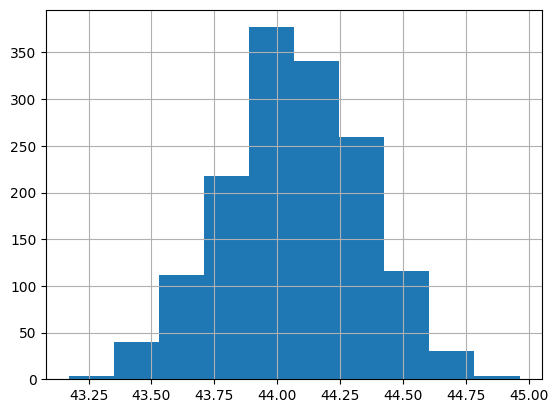

In [49]:
media_amostras.hist()
plt.show()

In [50]:
dados.Idade.mean()

44.07142113482561

In [51]:
media_amostras.mean()

44.0694

*O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para **n maior ou igual a 30**.*

In [52]:
media_amostras.std()

0.2769852936564225

In [53]:
desvio_padrao_da_variavel_original = dados.Idade.std()
desvio_padrao_da_variavel_original

12.48058346535974

In [54]:
desvio_padrao_da_amostra = desvio_padrao_da_variavel_original / np.sqrt(n)
desvio_padrao_da_amostra

0.27907433027404266

#### 4.2 Níveis de Confiança e Significância

O **nível de confiança ( 1 - alfa)** representa a probabilidade de acerto da estimativa. De forma complementar o **o nível de significância (alfa)** expressa a probabilidade de erro da estimativa.

Saiba mais: [Níveis de Confiança e Significância](https://www.youtube.com/watch?v=sWle26_vNbI&t=2s)


#### 4.3 Erro Inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** e pelo **nível de confiança** determinado para o processo

Saiba mais: [Erro Inferencial - Desvio Conhecido](https://www.youtube.com/watch?v=Ek6CH3MQTf4) , [Erro Inferencial - Desvio Desconhecido](https://www.youtube.com/watch?v=jS5bfLGHK84)



#### 4.4 Intervalos de Confiança


Saiba mais: [Intervalo de Confiança](https://proeducacional.com/ead/curso-cga-modulo-i/capitulos/capitulo-4/aulas/intervalo-de-confianca/)


#### Voltando ao Problema Inicial:

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvios padrão populacional igual a 150 g. Selecionada uma amostra aleatória de 20 sacos de um lote específico, obteve-se um peso médio de 5.050 g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 5%.

In [55]:
media_amostra = 5050
media_amostra

5050

In [56]:
significancia = 0.05
significancia

0.05

In [57]:
confianca = 1 - significancia
confianca

0.95

In [58]:
0.95 / 2 + 0.5 # curva normal

0.975

In [59]:


z = norm.ppf(0.975)
z

1.959963984540054

#### Obtenha Sigma x_barra



In [60]:
desvio_padrao = 150
n = 20
raiz_n = np.sqrt(n)

sigma_x_barra = desvio_padrao / raiz_n
sigma_x_barra

33.54101966249684

#### Obtenha o Erro Inferencial

In [61]:
e = z * sigma_x_barra
e

65.73919054324361

#### Solução 1 - Calculando o Intervalo de Confiança para a Média

In [62]:
intervalo = (
    media_amostra - e,
    media_amostra + e
)

intervalo

(4984.260809456757, 5115.739190543243)

#### Solução 2 - Calculando o intervalo de Confiança para a Média (usando biblioteca)

In [63]:
norm.interval(alpha=0.95, loc = media_amostra, scale = sigma_x_barra )

<ipython-input-63-68ecebaa41e3>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  norm.interval(alpha=0.95, loc = media_amostra, scale = sigma_x_barra )


(4984.260809456757, 5115.739190543243)

# 5 Cálculo do Tamanho da Amostra


Saiba mais: [Tamanho da Amostra - Video](https://www.youtube.com/watch?v=BkQex_KoTQI), [Tamanho da Amostra](https://pt.wikihow.com/Calcular-o-Tamanho-de-uma-Amostra)


#### - Problema

Estamos estudando o rendimento mensal dos chefes de domocílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhores é de **R$ 3.323,29**.
Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

#### - Observações

1. O desvio padrão e o erro devem estar na mesma unidade de medida.
2. Quando o erro for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

In [64]:
area_95 = 0.95 / 2 + 0.5
area_95

0.975

In [65]:
## de volta ao problema:

z = norm.ppf(area_95)
z

1.959963984540054

In [66]:
sigma = 3323.39

In [67]:
e = 100
e

100

In [68]:
n = (z * (sigma / e)) ** 2 # tamanho da amostra
int(n)

4242

#### 5.1 Variáveis Quantitativas e População Finita

Saiba mais: [Tamanho da Amostra - Video](https://www.youtube.com/watch?v=BkQex_KoTQI), [Tamanho da Amostra](https://pt.wikihow.com/Calcular-o-Tamanho-de-uma-Amostra)

#### - Problema

Em um lote de **10.000** de refrigerante foi realizada uma amostra aleatória simplesde **100 latas** e foi obtido o **desvio padrão amostral do contéudo das latas a 12** ml. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [69]:
N = 10000
N

10000

In [70]:
z = norm.ppf((0.5 + (0.95 / 2)))
z

1.959963984540054

In [71]:
s = 12
s

12

In [72]:
e = 5
e

5

In [73]:
n = ((z**2) *(s**2) * (N)) / (((z**2) *  (s**2)) + (e**2) * (N - 1)) # com desvio populacional desconhecido
int(n)

22

# 6 Exemplo Final com o nosso DataSet

#### - Exemplo: Rendimento Médio

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda de até R$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$ 10,00**. Sabemos que o desvio populacional deste grupo de trabalhadores é de **R$ 1.082,79** e que a **média populacional é de R$ 1.426,54**. Para um **nível de confiança de 95%**, qual dever se o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média conisderando o tamanho da amostra obtido?

In [74]:
# Construindo o dataset conforme espeficado pelo problema

renda_5000 = dados.query('Renda <= 5000').Renda
renda_5000

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 72109, dtype: int64

In [75]:
sigma = renda_5000.std() # desvio padrao populacional
sigma

1082.7945490306845

In [76]:
media = renda_5000.mean()
media

1426.5372144947232

#### Calculando o Tamanho da Amostra

In [77]:
z = norm.ppf(0.975)
e = 10
n = (z * (sigma / e) ** 2) # tamanho da amostra infinita como desvio padrao populacional conhecido
n_int = int(n)

In [78]:
n_int

22979

#### Calculando o Intervalo de Confiança para a Média



In [79]:
intervalo = norm.interval(alpha=0.95, loc = media, scale = sigma / np.sqrt(n))
intervalo

<ipython-input-79-eeaed60d2953>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha=0.95, loc = media, scale = sigma / np.sqrt(n))


(1412.5373431219568, 1440.5370858674896)

 #### Ilustrando com Gráfico


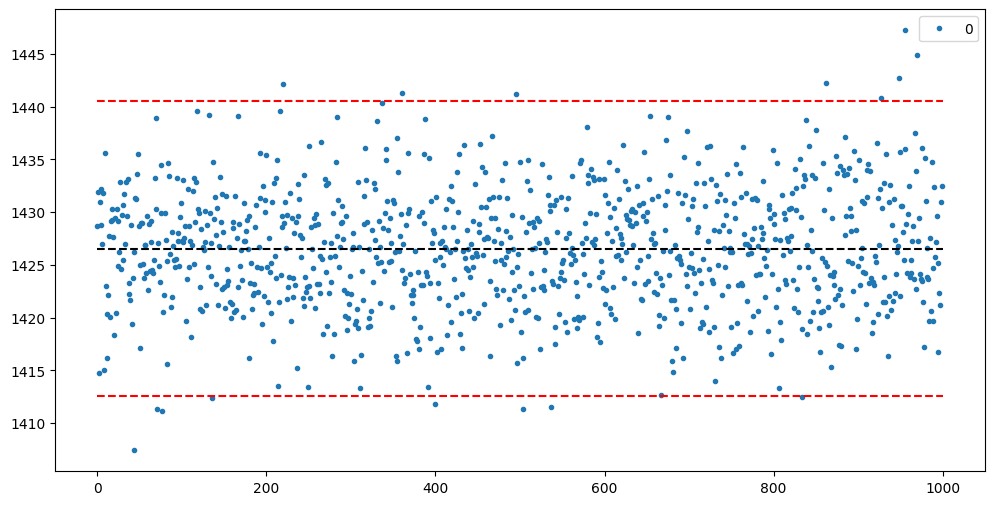

In [80]:
tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n_int).mean() for i in range(0, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12,6)
ax.hlines(y=media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y=intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y=intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')

plt.show()